In [4]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

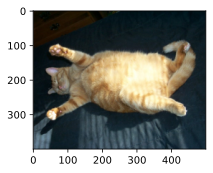

In [5]:
d2l.set_figsize()
img = d2l.Image.open('../../pytorch/img/cat1.jpg')
d2l.plt.imshow(img)

In [6]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    """在输入图像上多次运行图像增广方法aug并显示所有结果"""
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)


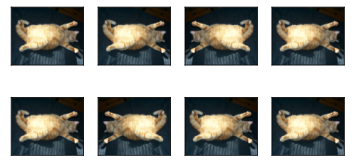

In [9]:
# 左右翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

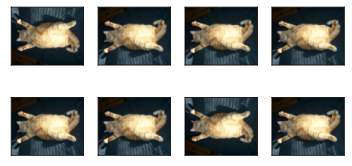

In [10]:
# 上下翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

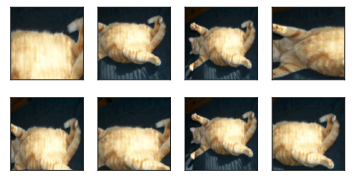

In [16]:
# 随机裁剪
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))

apply(img, shape_aug)

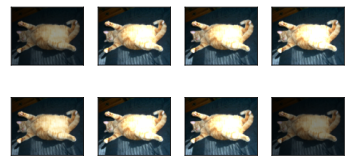

In [20]:
# 改变亮度
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0
))

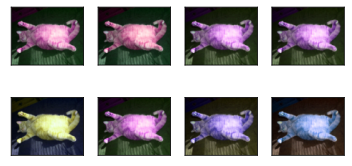

In [25]:
# 改变色调
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5
))

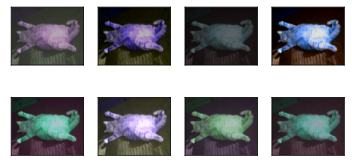

In [26]:
# 改变颜色：亮度（brightness）；对比度（contrast）；饱和度（saturation）；色调（hue）
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

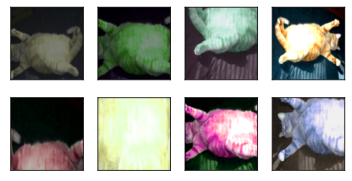

In [40]:
# 结合多种图像增广方式
augs = torchvision.transforms.Compose({
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug
})

apply(img, augs)